<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [61]:
df = pd.read_csv('house-votes-84.data', names=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17))
print(df.shape)
df.head()

(435, 17)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [62]:
df = df.rename(columns={
1: 'Class Name',
2: 'handicapped-infants',
3: 'water-project-cost-sharing',
4: 'adoption-of-the-budget-resolution',
5: 'physician-fee-freeze',
6: 'el-salvador-aid',
7: 'religious-groups-in-schools',
8: 'anti-satellite-test-ban',
9: 'aid-to-nicaraguan-contras',
10: 'mx-missile',
11: 'immigration',
12: 'synfuels-corporation-cutback',
13: 'education-spending',
14: 'superfund-right-to-sue',
15: 'crime',
16: 'duty-free-exports',
17: 'export-administration-act-south-africa'
})
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [63]:
df.dtypes

Class Name                                object
handicapped-infants                       object
water-project-cost-sharing                object
adoption-of-the-budget-resolution         object
physician-fee-freeze                      object
el-salvador-aid                           object
religious-groups-in-schools               object
anti-satellite-test-ban                   object
aid-to-nicaraguan-contras                 object
mx-missile                                object
immigration                               object
synfuels-corporation-cutback              object
education-spending                        object
superfund-right-to-sue                    object
crime                                     object
duty-free-exports                         object
export-administration-act-south-africa    object
dtype: object

In [64]:
df = df.replace('n', 0)
df = df.replace('y', 1)
df = df.replace('?', 0.5)
df = df.replace('republican', 0)
df = df.replace('democrat', 1)
df = df.astype('float')
df['Class Name'] = df['Class Name'].replace(0, 'republican')
df['Class Name'] = df['Class Name'].replace(1, 'democrat')
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
2,democrat,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0


In [65]:
print('handicapped-infants', (df['handicapped-infants'].value_counts()))
print('water-project-cost-sharing', (df['water-project-cost-sharing'].value_counts()))
print('adoption-of-the-budget-resolution', (df['adoption-of-the-budget-resolution'].value_counts()))
print('physician-fee-freeze', (df['physician-fee-freeze'].value_counts()))
print('el-salvador-aid', (df['el-salvador-aid'].value_counts()))
print('religious-groups-in-schools', (df['religious-groups-in-schools'].value_counts()))
print('anti-satellite-test-ban', (df['anti-satellite-test-ban'].value_counts()))
print('aid-to-nicaraguan-contras', (df['aid-to-nicaraguan-contras'].value_counts()))
print('mx-missile', (df['mx-missile'].value_counts()))
print('immigration', (df['immigration'].value_counts()))
print('synfuels-corporation-cutback', (df['synfuels-corporation-cutback'].value_counts()))
print('education-spending', (df['education-spending'].value_counts()))
print('superfund-right-to-sue', (df['superfund-right-to-sue'].value_counts()))
print('crime', (df['crime'].value_counts()))
print('duty-free-exports', (df['duty-free-exports'].value_counts()))
print('export-administration-act-south-africa', (df['export-administration-act-south-africa'].value_counts()))


handicapped-infants 0.0    236
1.0    187
0.5     12
Name: handicapped-infants, dtype: int64
water-project-cost-sharing 1.0    195
0.0    192
0.5     48
Name: water-project-cost-sharing, dtype: int64
adoption-of-the-budget-resolution 1.0    253
0.0    171
0.5     11
Name: adoption-of-the-budget-resolution, dtype: int64
physician-fee-freeze 0.0    247
1.0    177
0.5     11
Name: physician-fee-freeze, dtype: int64
el-salvador-aid 1.0    212
0.0    208
0.5     15
Name: el-salvador-aid, dtype: int64
religious-groups-in-schools 1.0    272
0.0    152
0.5     11
Name: religious-groups-in-schools, dtype: int64
anti-satellite-test-ban 1.0    239
0.0    182
0.5     14
Name: anti-satellite-test-ban, dtype: int64
aid-to-nicaraguan-contras 1.0    242
0.0    178
0.5     15
Name: aid-to-nicaraguan-contras, dtype: int64
mx-missile 1.0    207
0.0    206
0.5     22
Name: mx-missile, dtype: int64
immigration 1.0    216
0.0    212
0.5      7
Name: immigration, dtype: int64
synfuels-corporation-cutback 0.0

In [66]:
df.dtypes

Class Name                                 object
handicapped-infants                       float64
water-project-cost-sharing                float64
adoption-of-the-budget-resolution         float64
physician-fee-freeze                      float64
el-salvador-aid                           float64
religious-groups-in-schools               float64
anti-satellite-test-ban                   float64
aid-to-nicaraguan-contras                 float64
mx-missile                                float64
immigration                               float64
synfuels-corporation-cutback              float64
education-spending                        float64
superfund-right-to-sue                    float64
crime                                     float64
duty-free-exports                         float64
export-administration-act-south-africa    float64
dtype: object

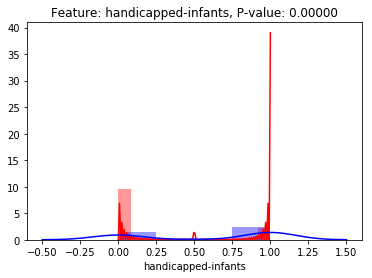

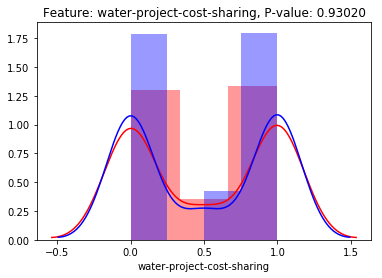

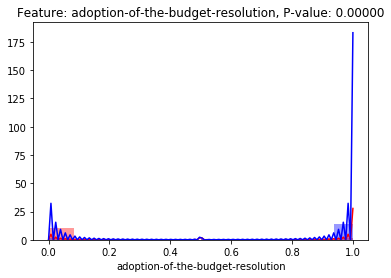

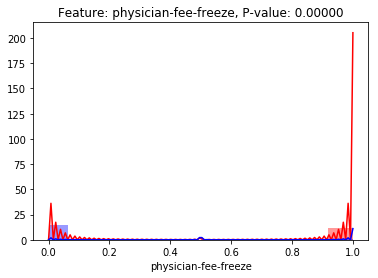

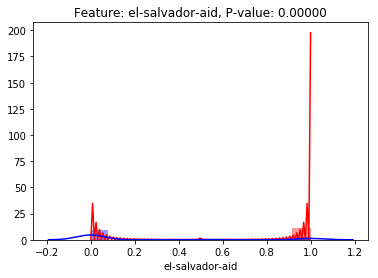

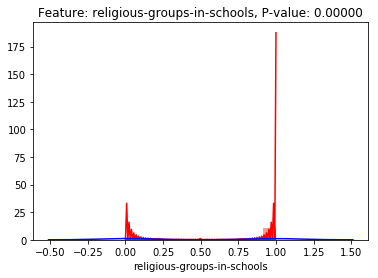

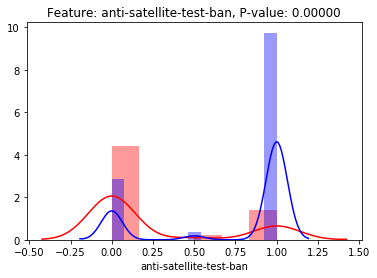

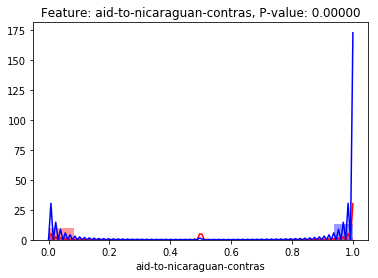

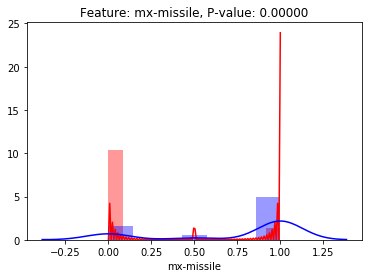

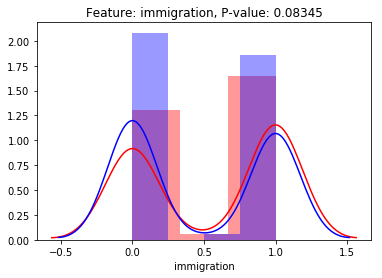

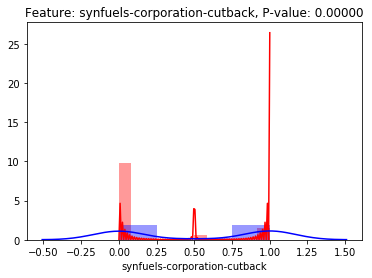

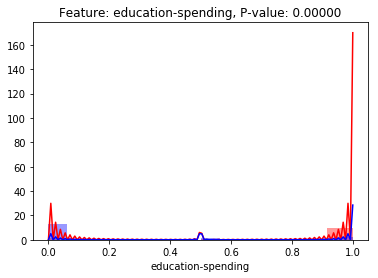

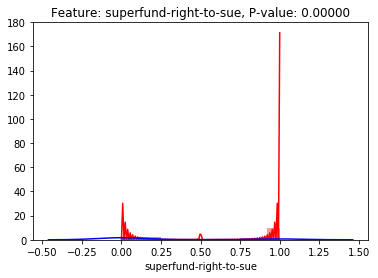

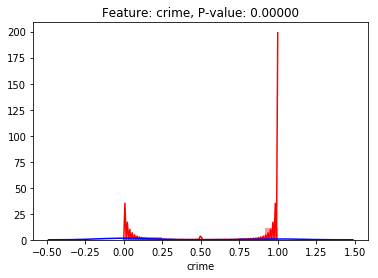

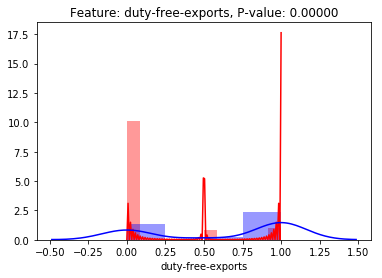

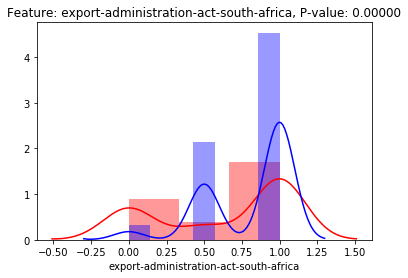

<Figure size 432x288 with 0 Axes>

In [67]:
data = df.drop(columns='Class Name')
for feat in data.columns:
  republicans = df[df['Class Name'] == 'republican'][feat]
  democrats = df[df['Class Name'] == 'democrat'][feat]
  sns.distplot(republicans, color='r')
  sns.distplot(democrats, color='b')
  _, pvalue = ttest_ind(republicans, democrats)
  plt.title(f'Feature: {feat}, P-value: {pvalue:.5f}')
  plt.figure()

In [0]:
# Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
# adoption of the budget resolution, anti satellite test ban, aid to nicarauguan contras, mx missile

# Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
# handicapped infants, physician fee freeze, el salvador aid, religious groups in schools, synfuels corporation cutback, education spending, superfund right to sue, crime, duty free exports, 

# Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)
# water project cost sharing